Downloading the source dataset directly from medmnist

In [ ]:
!apt-get install -y git
!git clone https://github.com/MedMNIST/MedMNIST.git

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.9).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
fatal: could not create work tree dir 'MedMNIST': Transport endpoint is not connected


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist')



In [ ]:
!pip install medmnist

In [ ]:
import os
import numpy as np
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

data_flag = 'breastmnist'
download = True

info = INFO[data_flag]
task = info['task']
n_channels = info['n_channels']
n_classes = len(info['label'])




MedMNIST v2.2.2 @ https://github.com/MedMNIST/MedMNIST/


From the medmnist documentation we are using the below code snippet to load the data. We have get_loader that loads the train_images,train_labels,test_images, test_labels, val_images, val_labels files into train_dataset, test_dataset and validation_dataset.

In [ ]:
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

Since our dataset is relatively small we will be using a batch size of the whole dataset.

In [ ]:

DataClass = getattr(dataset_without_pytorch, info['python_class'])

train_dataset = DataClass(split='train', download=download)
test_dataset = DataClass(split='test', download=download)
validation_dataset = DataClass(split='val', download=download)

# Set the batch size to the total number of samples in the dataset
batch_size_train = 546
batch_size_val=78
batch_size_test=156

train_loader = get_loader(dataset=train_dataset, batch_size=batch_size_train)
test_loader = get_loader(dataset=test_dataset, batch_size=batch_size_test)
val_loader = get_loader(dataset=validation_dataset, batch_size=batch_size_val)

Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz
Using downloaded and verified file: /root/.medmnist/breastmnist.npz


In [ ]:
train_dataset

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 546
    Root location: /root/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

In [ ]:
test_dataset

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 156
    Root location: /root/.medmnist
    Split: test
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

In [ ]:
validation_dataset

Dataset BreastMNIST (breastmnist)
    Number of datapoints: 78
    Root location: /root/.medmnist
    Split: val
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'malignant', '1': 'normal, benign'}
    Number of samples: {'train': 546, 'val': 78, 'test': 156}
    Description: The BreastMNIST is based on a dataset of 780 breast ultrasound images. It is categorized into 3 classes: normal, benign, and malignant. As we use low-resolution images, we simplify the task into binary classification by combining normal and benign as positive and classifying them against malignant as negative. We split the source dataset with a ratio of 7:1:2 into training, validation and test set. The source images of 1×500×500 are resized into 1×28×28.
    License: CC BY 4.0

In [ ]:
train_imgs,train_labels=next(train_loader)
val_imgs,val_labels=next(val_loader)
test_imgs,test_labels=next(test_loader)

Size 546
Size 78
Size 156


Unpacking the contents from drive folders into their respective arrays

In [ ]:
from tqdm import tqdm
import cv2
import os
os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/train/[0]')
X_train=[]
y_train=[]

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_train.append(img)
  y_train.append(0)

os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/train/[1]')

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_train.append(img)
  y_train.append(1)

print(y_train)


100%|██████████| 399/399 [00:02<00:00, 189.62it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
from tqdm import tqdm
import cv2
import os
os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/test/[0]')
X_test=[]
y_test=[]

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_test.append(img)
  y_test.append(0)

os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/test/[1]')

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_test.append(img)
  y_test.append(1)

print(y_test)


100%|██████████| 114/114 [00:00<00:00, 225.34it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
from tqdm import tqdm
import cv2
import os
os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/val/[0]')
X_val=[]
y_val=[]

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_val.append(img)
  y_val.append(0)

os.chdir('/content/drive/MyDrive/MedMNIST/breast_mnist/breast_mnist/val/[1]')

for i in tqdm(os.listdir()):
  img=cv2.imread(i)
  img=cv2.resize(img,(224,224))
  X_val.append(img)
  y_val.append(1)

print(y_val)


100%|██████████| 57/57 [00:00<00:00, 91.29it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
images=np.concatenate((X_train,X_test,X_val))
labels=np.concatenate((y_train,y_test,y_val))

In [ ]:
from sklearn.model_selection import train_test_split
train_images,test_images,train_labels,test_labels=train_test_split(images,labels,test_size=.33,random_state=42)

In [ ]:
train_images[0].shape

(224, 224, 3)

Visualising the dataset

In [ ]:
import tensorflow as tf
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
train_labels=le.fit_transform(train_labels)
test_labelst=le.fit_transform(test_labels)
train_labels=tf.keras.utils.to_categorical(train_labels,num_classes=2)
test_labels=tf.keras.utils.to_categorical(test_labels,num_classes=2)


In [ ]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_labels=np.array(train_labels)
test_labels=np.array(test_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(522, 224, 224, 3)
(522, 2)
(258, 224, 224, 3)
(258, 2)


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(1,4,i+1)
  plt.imshow(train_images[i],cmap='gray')
  plt.title(train_labels[i])
  plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Since we are using VGG16, we will solve this as a multi-class classification problem rather than binary classification problem. We generate two classes as we have two categories, malignant and benign.

Converting these changes into np arays

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Dense, Dropout, Flatten, BatchNormalization

We will use imagenet weights to train VGG16 model. We are using transfer learning here.

In [ ]:
from keras.applications import VGG16
img_rows, img_cols= 224, 224

vgg=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_rows,img_cols,3)
)

We are going to freeze all the top layers.

In [ ]:
for layer in vgg.layers:
  layer.trainable=False

In [ ]:
for (i,layer) in enumerate(vgg.layers):
  print(str(i) + " " + layer.__class__.__name__,layer.trainable)

0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


We are going to add our own layers to the model. At the bottom.

In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
def tw(bottom_model,num_classes):
  top_model=bottom_model.output
  top_model=GlobalAveragePooling2D()(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(512,activation='relu')(top_model)
  top_model=Dense(num_classes,activation='softmax')(top_model)
  return top_model



In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D, ZeroPadding2D

num_classes=2

FC_head=tw(vgg,num_classes)

model=Model(inputs=vgg.input, outputs=FC_head)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
import tensorflow as tf
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/content/drive/MyDrive/models/model2_diagram.png', show_shapes=True, show_layer_names=True)

So now we have images resized to 224,224,3 and the train dataset has 522 samples belonging to two classes

We will train the model on the train dataset. Let's have a look at some metrics before training. Just on the compiled model itself.

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.optimizers import Adam
# Assuming you have already trained the model1, and it's ready for evaluation

# Compile the model with the desired metrics
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=tf.losses.BinaryCrossentropy(),
    metrics=[Precision(), Recall(), BinaryAccuracy()]
)

# Evaluate the model on the test dataset
results = model.evaluate(test_images, test_labels)

# Extract the metrics from the evaluation results
precision_value = results[1]
recall_value = results[2]
binary_accuracy_value = results[3]

print("Precision:", precision_value)
print("Recall:", recall_value)
print("Binary Accuracy:", binary_accuracy_value)


9/9 [==============================] - 156s 16s/step - loss: 0.7345 - precision_1: 0.6899 - recall_1: 0.6899 - binary_accuracy: 0.6899
Precision: 0.6899224519729614
Recall: 0.6899224519729614
Binary Accuracy: 0.6899224519729614


In [ ]:
history=model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/5
17/17 [==============================] - 502s 30s/step - loss: 1.2281 - precision_1: 0.6877 - recall_1: 0.6877 - binary_accuracy: 0.6877 - val_loss: 0.4962 - val_precision_1: 0.7403 - val_recall_1: 0.7403 - val_binary_accuracy: 0.7403
Epoch 2/5
17/17 [==============================] - 493s 30s/step - loss: 0.4864 - precision_1: 0.7854 - recall_1: 0.7854 - binary_accuracy: 0.7854 - val_loss: 0.4363 - val_precision_1: 0.8062 - val_recall_1: 0.8062 - val_binary_accuracy: 0.8062
Epoch 3/5
17/17 [==============================] - 490s 30s/step - loss: 0.4090 - precision_1: 0.8218 - recall_1: 0.8218 - binary_accuracy: 0.8218 - val_loss: 0.3891 - val_precision_1: 0.8217 - val_recall_1: 0.8217 - val_binary_accuracy: 0.8217
Epoch 4/5
17/17 [==============================] - 492s 30s/step - loss: 0.3265 - precision_1: 0.8736 - recall_1: 0.8736 - binary_accuracy: 0.8736 - val_loss: 0.3901 - val_precision_1: 0.8295 - val_recall_1: 0.8295 - val_binary_accuracy: 0.8295
Epoch 5/5
17/17 [===

In [ ]:
model.save('/content/drive/MyDrive/models/model_vgg16.h5')


<Figure size 640x480 with 0 Axes>

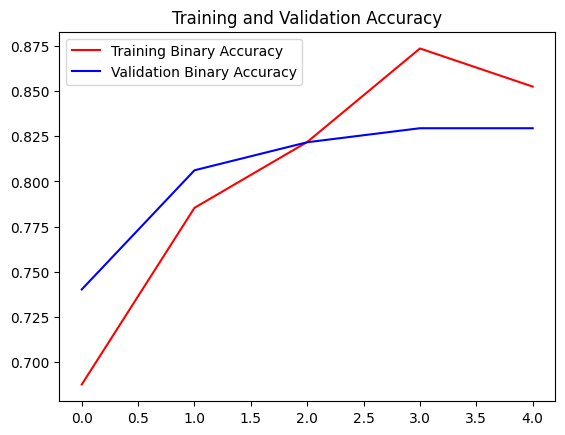

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training Binary Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Binary Accuracy')

plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

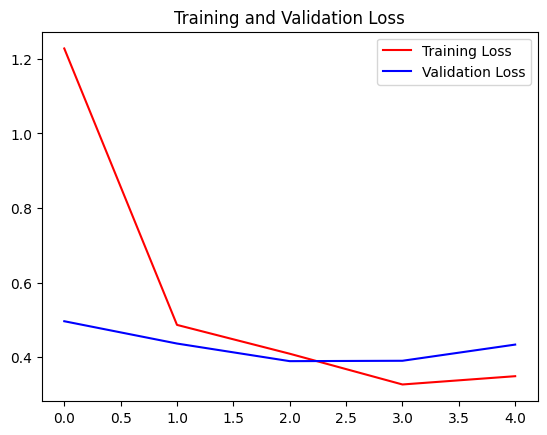

<Figure size 640x480 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')

plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

Fine tuning...

In [ ]:
model.save('/content/drive/MyDrive/models/model_vgg16.h5')


1/1 [==============================] - 1s 1s/step
The prediction for this image is:  [[0.8294856 0.1705144]]
The actual label for this image is:  [1. 0.]


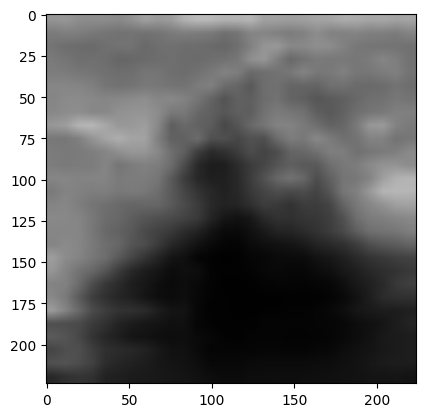

In [ ]:
n=24  #Select the index of image to be loaded for testing
img = test_images[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", model.predict(input_img))
print("The actual label for this image is: ", test_labels[n])


In [ ]:
y_true_multilabel = np.array(test_labels)


In [ ]:
p1 = model.predict(test_images)
y_pred_multilabel = np.round(p1).astype(int)

# Compare multi-label predictions with true multi-label labels
accuracy_multilabel = np.mean(np.all(y_pred_multilabel == y_true_multilabel, axis=1))
print("Multi-label Accuracy:", accuracy_multilabel)


9/9 [==============================] - 148s 16s/step
Multi-label Accuracy: 0.8294573643410853


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

# Flatten the multi-label arrays to 1D arrays
test_labels_flat = np.argmax(test_labels, axis=1)
y_pred_multilabel_flat = np.argmax(y_pred_multilabel, axis=1)

# Create the confusion matrix
cm = confusion_matrix(test_labels_flat, y_pred_multilabel_flat)
print('Confusion Matrix')
print(cm)

# Rest of the code for classification report, etc.


print('Classification Report')

target_names=['malignant','normal benign']

print(classification_report(test_labels_flat,y_pred_multilabel_flat,target_names=target_names))


Confusion Matrix
[[ 32  38]
 [  6 182]]
Classification Report
               precision    recall  f1-score   support

    malignant       0.84      0.46      0.59        70
normal benign       0.83      0.97      0.89       188

     accuracy                           0.83       258
    macro avg       0.83      0.71      0.74       258
 weighted avg       0.83      0.83      0.81       258



In [ ]:
import seaborn as sns
sns.set(font_scale=1.0)
ax=sns.heatmap(cm,annot=True, cmap='summer',cbar=False,linecolor='r',linewidth=3,square=True,xticklabels=target_names,yticklabels=target_names,fmt='d')

sns.set(font_scale=2.0)
ax.set_title('Seaborn confusion matrix with labels\n\n')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')

Text(109.44999999999997, 0.5, 'Predicted Values')

Does the model improve in perfromance? We still observe class imbalance when it comes to classifying malignant cases. However the model is going to predict based a probablity of which class the image belongs too.

In [ ]:
results = model.evaluate(test_images, test_labels)

# Extract the metrics from the evaluation results
precision_value = results[1]
recall_value = results[2]
binary_accuracy_value = results[3]

9/9 [==============================] - 168s 18s/step - loss: 0.4335 - precision_1: 0.8295 - recall_1: 0.8295 - binary_accuracy: 0.8295


In [ ]:
print('Precision:',precision_value)
print('Recall:',recall_value)
print('Binary Accuracy:,',binary_accuracy_value)

Precision: 0.8294573426246643
Recall: 0.8294573426246643
Binary Accuracy:, 0.8294573426246643
